## Statistical thinking part 1

In [13]:
#import sys
#!{sys.executable} -m pip install seaborn

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
#import scipy
#from scipy.stats import norm

# get matplot to show charts inline
%matplotlib inline

df_swing = pd.read_csv('2008_swing_states.csv')
df_swing.head()

state           county  total_votes  dem_votes  rep_votes  dem_share
0    PA      Erie County       127691      75775      50351      60.08
1    PA  Bradford County        25787      10306      15057      40.64
2    PA     Tioga County        17984       6390      11326      36.07
3    PA    McKean County        15947       6465       9224      41.21
4    PA    Potter County         7507       2300       5109      31.04

## TODO pandas_profiling

Above shows a part of the csv file contents (number of votes for the democrats and republicans per county)

In [15]:
df_swing[['state','county','dem_share']].head()

state           county  dem_share
0    PA      Erie County      60.08
1    PA  Bradford County      40.64
2    PA     Tioga County      36.07
3    PA    McKean County      41.21
4    PA    Potter County      31.04

We are just interested in the percentage of votes for the democrats per county

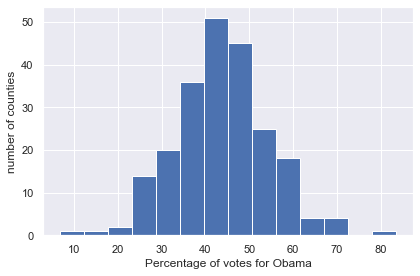

In [16]:
x = df_swing['dem_share']

# Number of bins could be the square root of number of data points
num_bins = int(np.sqrt(len(x.values)))

bin_edges = [item for item in range(0, 110, 10)]
sns.set()
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins)

# add a 'best fit' line
#mu = np.mean(x)
#sigma = np.std(x)
#print(mu, sigma)
#y = mlab.normpdf(bins, mu, sigma)
#y = norm.pdf(bins, mu, sigma)
#ax.plot(bins, y, '--')
ax.set_xlabel('Percentage of votes for Obama')
ax.set_ylabel('number of counties')
#ax.set_title(r'Histogram of Votes: $\mu=10$, $\sigma=5$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

## Problems with histograms
1.  Binning bias (use a ECDF plot to eliminate this problem)
2.  Not all the data is shown (we are sweeping the data into bins)

### TODOs
1.  Calculate an normal distribution and plot it over the existing data
2.  Plot a trend line
3.  Figure out how to create and call a function library
4.  Calculate and add mean and sigma to the histogram title

## Bee swarm plot

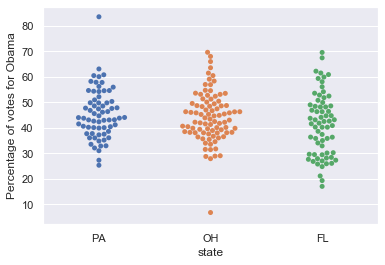

In [17]:
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('Percentage of votes for Obama')
plt.show()

### TODO
1.  Plot the means for the states on bee swarm plot

## Empirical cumulative distribution function (ECDF)
The y value is the fraction of data points that have a value smaller than the corresponding x value.

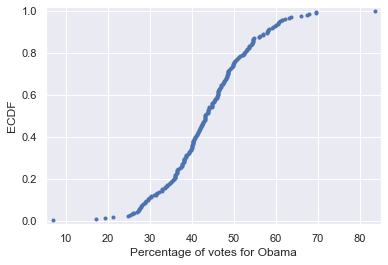

In [18]:
%run ECDF.ipynb
#x = np.sort(df_swing['dem_share'])
#y = np.arange(1, len(x) + 1) / len(x)
x, y = compute_ecdf(df_swing['dem_share'])
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Percentage of votes for Obama')
_ = plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

* 20% of counties had 36% or less votes for Obama
* 75% of counties had 50% or less votes for Obama

### TODO
Overlay percentiles
```
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red', linestyle='none')
```

In [19]:
print('Percentiles vote percentage [25th, 50th and 75th]:', np.percentile(df_swing['dem_share'], (25, 50, 75)))

Percentiles vote percentage [25th, 50th and 75th]: [37.3025 43.185  49.925 ]


## ECDF for each state

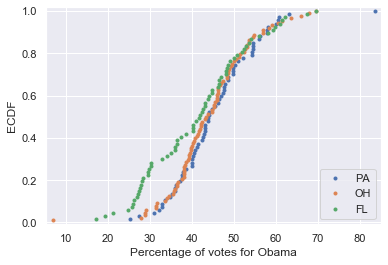

In [20]:
states = df_swing['state'].unique()

for state in states:
    x, y = compute_ecdf(df_swing[df_swing['state'] == state]['dem_share'])
    #x = np.sort(df_swing[df_swing['state'] == state]['dem_share'])
    #print(x)
    #y = np.arange(1, len(x) + 1) / len(x)
    _ = plt.plot(x, y, marker='.', linestyle='none')

_ = plt.xlabel('Percentage of votes for Obama')
_ = plt.ylabel('ECDF')
_ = plt.legend(states, loc='lower right')
plt.margins(0.02)
plt.show()

* xbar = mean (heavily affected by outliers)
* median -> middle value of the data

## Boxplot

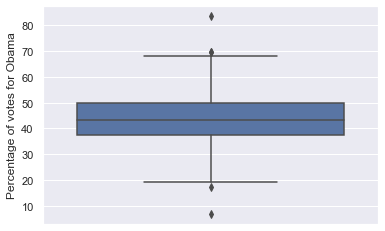

Percentiles vote percentage for Obama [25th, 50th and 75th]: [37.3025 43.185  49.925 ] min: 6.8 max: 83.56


In [21]:
dem_share = df_swing['dem_share']
_ = sns.boxplot(dem_share, orient='v')
_ = plt.ylabel('Percentage of votes for Obama')
plt.show()
print('Percentiles vote percentage for Obama [25th, 50th and 75th]:', np.percentile(dem_share, (25, 50, 75)), 
      'min:', min(dem_share), 'max:', max(dem_share))

## Boxplot for each state

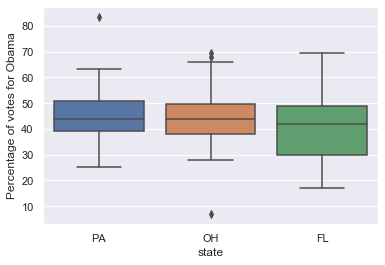

In [22]:
_ = sns.boxplot(x='state', y='dem_share', data=df_swing)    
_ = plt.ylabel('Percentage of votes for Obama')
plt.show()

* The mean captures that magnatude of the data
* The variance captures the spread and variability of the data

## Scatterplot

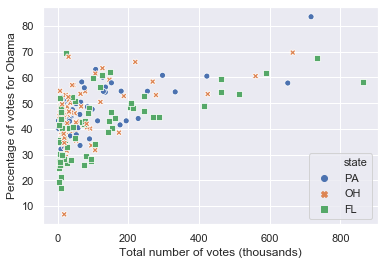

In [23]:
total_votes_thousands = df_swing['total_votes'] / 1000
_ = sns.scatterplot(y='dem_share', x=total_votes_thousands, data=df_swing, hue='state', style='state')
_ = plt.ylabel('Percentage of votes for Obama')
_ = plt.xlabel('Total number of votes (thousands)')
plt.show()

* Covariance: how quantities vary together
* Pearson correlation coefficient is the variability due to co-dependence divide by independent variability
  * Between -1.0 and 1.0
  * The closer to the ends of the scale, the stronger the correlation between the data sets
  * The closer to zero, the weaker the correlation

In [24]:
covariance = np.cov(df_swing['dem_share'], total_votes_thousands)
pearson_correlation = np.corrcoef(df_swing['dem_share'], total_votes_thousands)[0, 1]
print('covariance:', round(covariance[0, 1]), 'pearson_correlation:', round(pearson_correlation, 3))

covariance: 817.0 pearson_correlation: 0.536


### Hacker statistics
* Uses simulated repeated measurements to compute probabilities